In [3]:
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
time = [0,5,10,15,20,25,30]
U = [2.1,2,1.96,1.56,1.50,1.19,1.14]

a =  -0.03542857143083
b =  2.167142857145403
sigma_a =  0.0035190443915006776
sigma_b =  0.06344047484261675
S_e =  0.07868822487954519
Relative S_r a = %  9.932786588279987
Relative S_r b = %  2.9273785359116387
<ipython-input-22-e4bbc431e4aa>:46: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('pictures/graph.png', dpi=400, quality=100)


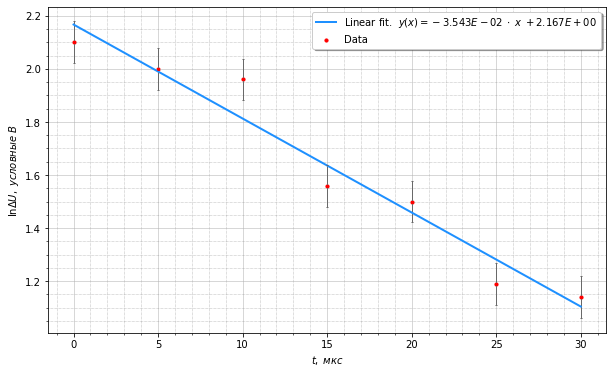

In [22]:
Y = np.array(U)
X = np.array(time)

def approx(x, a, b):
    return a*x + b
beta_opt1, beta_cov1 = curve_fit(approx, X, Y, maxfev = 20000)
a = beta_opt1[0]
b = beta_opt1[1]

print('a = ', a)
print('b = ', b)

#получим погрешности для коэффициентов
sigma_a = np.sqrt(beta_cov1[0,0])
sigma_b = np.sqrt(beta_cov1[1,1])

print('sigma_a = ', sigma_a)
print('sigma_b = ', sigma_b)


residuals1 = Y - approx(X,*beta_opt1)
fres1 = sum(residuals1**2)
S_e = np.sqrt(fres1/len(X))
print('S_e = ', S_e)

print('Relative S_r a = % ', 100* sigma_a/abs(a))
print('Relative S_r b = % ', 100* sigma_b/abs(b))

fig, ax = plt.subplots(figsize=(10, 6))
dots = X
ax.plot(dots, approx(dots, *beta_opt1), 'dodgerblue', lw = 2,  ls = '-')
ax.scatter(X, Y, s = 10, c = 'r')
lgnd = ax.legend([r'Linear fit.  $y(x) = {:.3E} \; \cdot \; x \; + {:.3E}$'.format(a, b), 'Data'], loc='best', shadow=True)
# lgnd = ax.legend([r'Data'], loc='best', shadow=True)
# ax.set_title(r'')
ax.set_ylabel(r'$\ln{\Delta U}, \; условные \;В$')
ax.set_xlabel(r'$t, \; мкс$')


ax.minorticks_on()
ax.grid(which='minor', color = 'gray', linestyle = ':', linewidth = 0.5)
ax.grid(which='major', linewidth = 0.5)

plt.errorbar(X, Y, fmt = 'ro', markersize = '2', yerr = S_e, capsize = 1, elinewidth = 1, capthick = 1, ecolor = 'dimgray')

plt.savefig('pictures/graph.png', dpi=400, quality=100)
plt.show()

In [21]:
-1/a * 0.099327

2.803584677240626

array([0.74193734, 0.69314718, 0.67294447, 0.44468582, 0.40546511,
       0.17395331, 0.13102826])